---
# <center><font color="#23C9FF">Diabetes Data Analysis & Prediction</font></center>
---

## <center style='color: #23C9FF;'>About Dataset</center>
<p style='text-align: justify;'>This dataset is originally from the National Institute of Diabetes and
Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.2 From the data set in the (.csv) File We can find several variables, some of them are independent (several medical predictor variables) and only one target dependent variable (Outcome).</p>

### <center style='color: #23C9FF;'>1. Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import tensorflow as tf

2023-10-01 19:42:56.898389: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 19:42:56.949719: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-01 19:42:56.949766: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-01 19:42:56.949829: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-01 19:42:56.959682: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-01 19:42:56.960632: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

### <center style='color: #23C9FF;'>2. Data Laoding & Exploratory Analysis

In [2]:
data = pd.read_csv ("diabetes.csv")
data.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print (f"The shape of the dataset : {data.shape}")
print (f"The dataset has {data.shape[0]} rows and {data.shape[1]} columns.")
print ("=======================================\n")

print (f"Data (variables) types :\n{data.dtypes}")
print ("=======================================\n")

print (f"The number of missing values (na) is each column :\n{data.isna ().sum()}")
print ("=======================================\n")

print ("Descriptive statistics :\n")
data.describe ()

The shape of the dataset : (768, 9)
The dataset has 768 rows and 9 columns.

Data (variables) types :
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The number of missing values (na) is each column :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Descriptive statistics :



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### <font color="#23C9FF">Récapitulation</font> :
#### <font color="#23C9FF">2.1 Variabes</font>
    - Features : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age,
    - Target : Outcome
#### <font color="#23C9FF">2.2 Dimensions</font>
    - Rows : 768
    - Columns : 9
#### <font color="#23C9FF">2.3 Data Types</font>
    - int64 : Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, Outcome
    - float64 : BMI, DiabetesPedigreeFunction
#### <font color="#23C9FF">2.4 Missing Values</font>
    - Aucune : étant donné qu'il y a aucune valeur manquante, on ne fera pas un nettoyage de données.

#### <font color="#23C9FF">2.5 Distribution & Outliers</font>

* ***<font color="#23C9FF">Distribution of the target variable</font>***

In [4]:
data['Outcome'].value_counts ()

0    500
1    268
Name: Outcome, dtype: int64

* ***<font color="#23C9FF">Normal ditribution before handling outliers</font>***

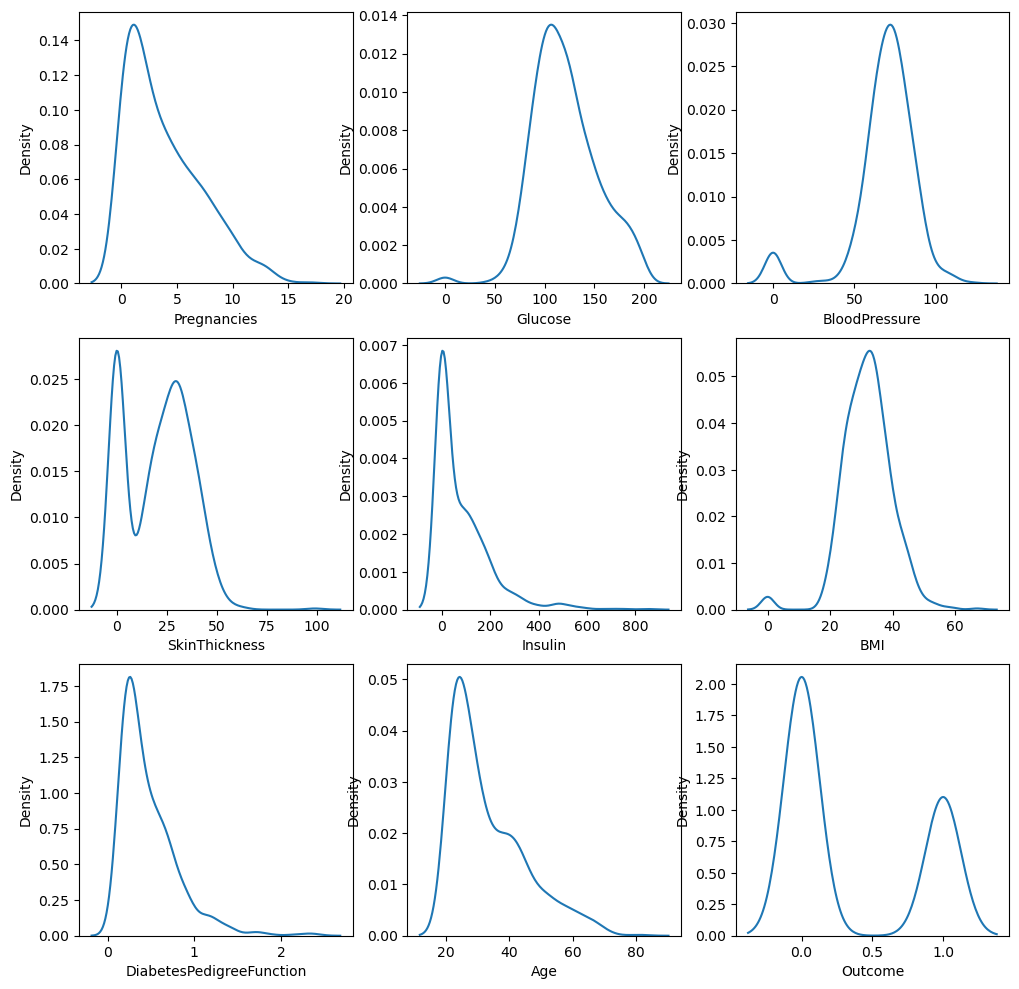

In [5]:
plt.figure (figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (3, 3, i)
    sns.kdeplot (data[col])
    i += 1

* ***<font color="#23C9FF">Boxplots before handling outliers</font>***

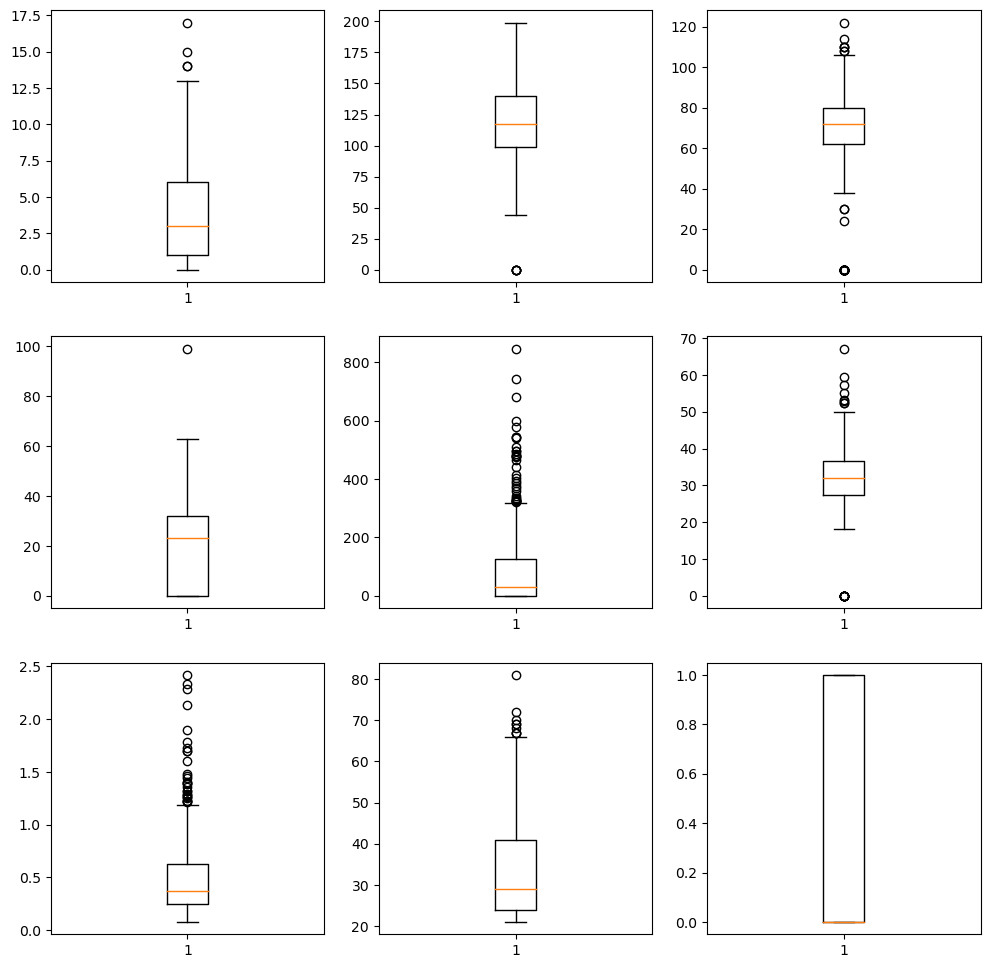

In [6]:
plt.figure(figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (3, 3, i)
    # data[[col]].boxplot ()
    plt.boxplot(data[[col]], vert = True)
    i += 1

* <font color="#23C9FF">***Outliers*** : Detecting Outliers using the Inter Quartile Range (IQR)<br>
**Criteria** : Is an outlier every data that lies 1.5 times of IQR above Q3 and below Q1.

In [7]:
def detect_outliers_iqr (data) :
    for col in data.iloc[:,:-1]:
        q3 = data[col].quantile(0.75)
        q1 = data[col].quantile(0.25)
        IQR = q3-q1
        up_limit = q3 + 1.5 * IQR
        lw_limit = q1 - 1.5 * IQR

        data[col] = np.where(data[col]>up_limit, up_limit,
                          np.where(data[col]<lw_limit , lw_limit , data[col]))

In [8]:
detect_outliers_iqr (data)
data.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1


* ***<font color="#23C9FF">Boxplots before handling outliers</font>***

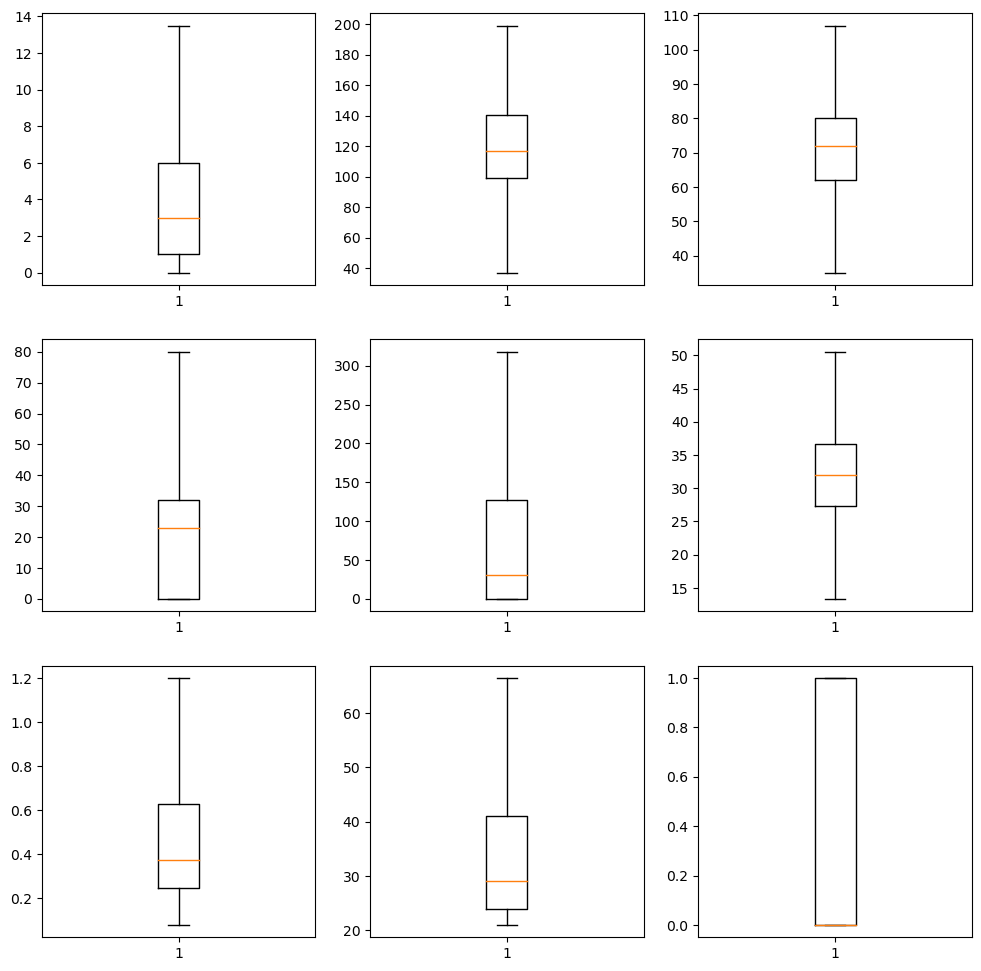

In [9]:
plt.figure(figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (3, 3, i)
    plt.boxplot(data[[col]], vert = True)
    i += 1

* ***<font color="#23C9FF">Normal ditribution after handling outliers</font>***

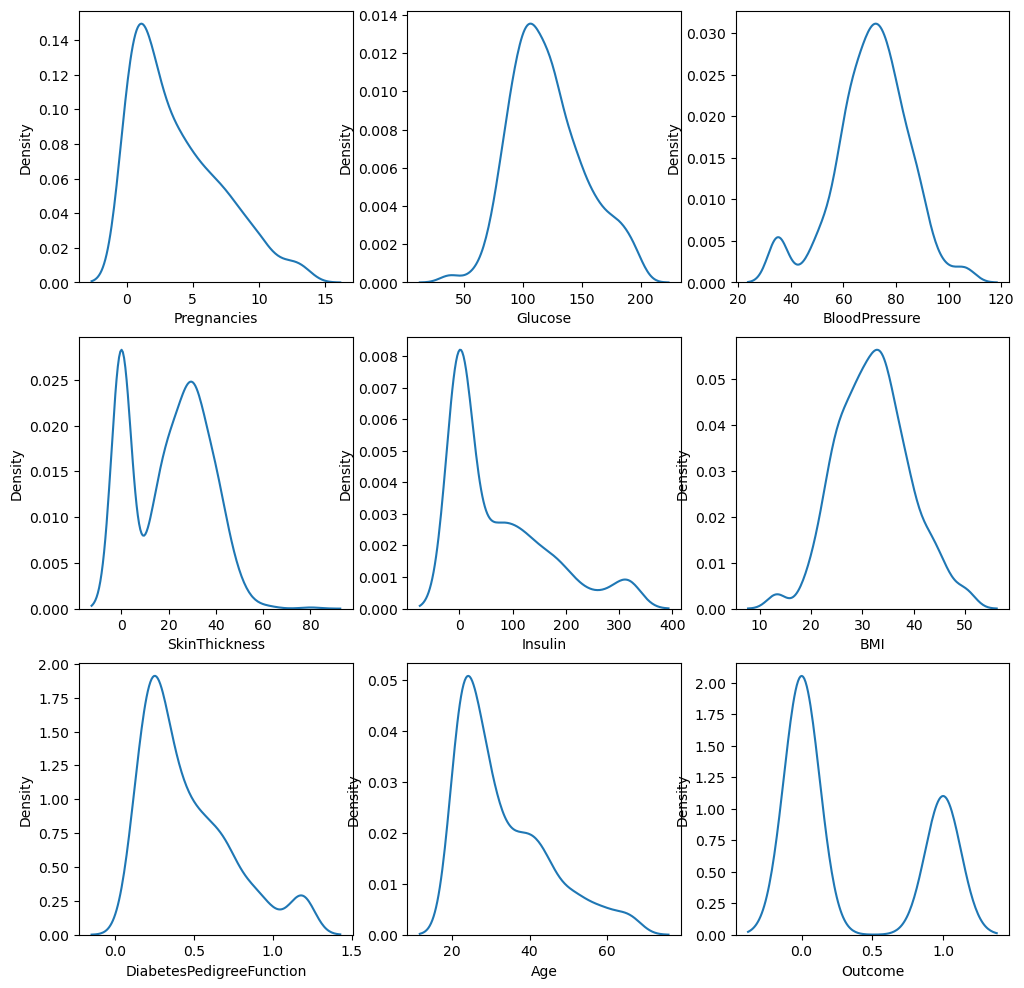

In [10]:
plt.figure (figsize = (12, 12))
i = 1
for col in data.columns :
    plt.subplot (3, 3, i)
    sns.kdeplot (data[col])
    i += 1

### <center style='color: #23C9FF;'>3. Machine Learning Model (Training & Testing Prediction)

#### <font color="#23C9FF">3.1 Training & Testing subsets</font>
Here, first thing first we separate the featuares (X) from the target (Y(+). Then we split the features and the target into two subsets each for traing and testing purpose our future model. We take 80% of the data for training and 20% for testing.

In [11]:
X = data.drop ('Outcome', axis = 1)
Y = data ['Outcome']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [12]:
print ("Shape of X_train", X_train.shape)
print ("Shape of X_test", X_test.shape)
print ("Shape of Y_train", Y_train.shape)
print ("Shape of Y_test", Y_test.shape)

Shape of X_train (614, 8)
Shape of X_test (154, 8)
Shape of Y_train (614,)
Shape of Y_test (154,)


#### <font color="#23C9FF">3.2 Classification/pridiction algorithms</font>

##### <font color="#23C9FF">3.2.1 Logistic Regression
Since we are going to make a classification of diabete, an appropriate model is logistic regression. Therefore, we will create an instance of the ```LogisticRegression``` model from the ```linear_model``` module of the scikit-learn(```sklearn```) library. We will then train this model using the ```fit()``` method. After that, we will make a prediction of the variable Y (Outcome).

###### <font color="#23C9FF">a. Model

In [13]:
# Model : LogisticRegression 
model = LogisticRegression ()

# Training
model.fit (X_train, Y_train)

/home/hassane/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

##### <font color="#23C9FF">b. Prediction</font>

In [14]:
Y_pred = model.predict (X_test)
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

##### <font color="#23C9FF">c. Confusion Matrix & Accuracy</font>

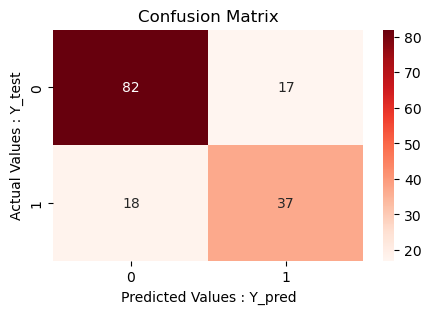

In [15]:
# Create a matrix of confusion
cf_matrix = confusion_matrix (Y_test, Y_pred)

# Visualize the matrix using Seaborn
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.ylabel ("Actual Values : Y_test")
plt.xlabel ("Predicted Values : Y_pred")
plt.show ()

In [16]:
confusion_matrix (Y_test, Y_pred)

array([[82, 17],
       [18, 37]])

In [17]:
log_reg_accuracy = accuracy_score (Y_test, Y_pred) * 100
print ("The model's accuracy is :", round (log_reg_accuracy, 2), '%')
# model.score (X, Y)

The model's accuracy is : 77.27 %


In [18]:
print ("\t\t\tClassification report :\n", classification_report (Y_test, Y_pred))

			Classification report :
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



##### <font color="#23C9FF">3.2.2 KNN (K-Nearest Neighbors) algorithme</font>
For data classification, we also use the K-nearest neighbors algorithme method.

In [19]:
knn_model = KNeighborsClassifier ()
knn_model.fit (X_train, Y_train)

knn_y_pred = knn_model.predict (X_test)
knn_y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

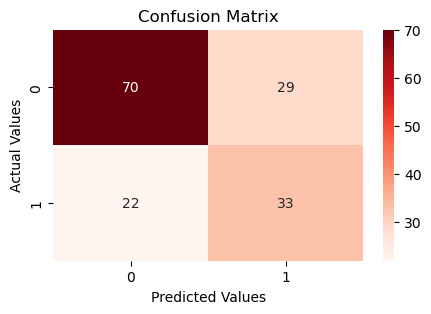

In [20]:
cf_matrix = confusion_matrix (Y_test, knn_y_pred)
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.ylabel ("Actual Values")
plt.xlabel ("Predicted Values")
plt.show ()

In [21]:
knn_accuracy = accuracy_score (Y_test, knn_y_pred) * 100
print ("Accuracy of the KNN model :", round (knn_accuracy, 2), '%')
# knn_model.score (X, Y)

Accuracy of the KNN model : 66.88 %


In [22]:
print("\t\t\tClassification report :\n", classification_report (Y_test, knn_y_pred))

			Classification report :
               precision    recall  f1-score   support

           0       0.76      0.71      0.73        99
           1       0.53      0.60      0.56        55

    accuracy                           0.67       154
   macro avg       0.65      0.65      0.65       154
weighted avg       0.68      0.67      0.67       154



##### <font color="#23C9FF">3.2.3 Decision Tree</font>

In [23]:
# Create a decision tree classifier
dtc = DecisionTreeClassifier()

# Fit the model to the data
dtc.fit (X_train, Y_train)

# Make predictions on the test data
dtc_y_pred = dtc.predict(X_test)
dtc_y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

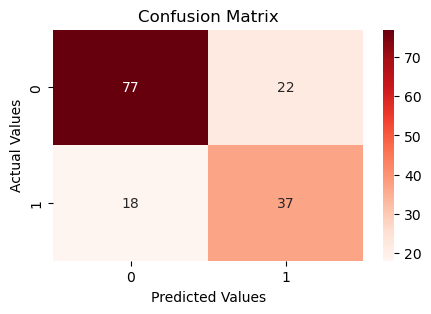

In [24]:
cf_matrix = confusion_matrix (Y_test, dtc_y_pred)
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.ylabel ("Actual Values")
plt.xlabel ("Predicted Values")
plt.show ()

In [25]:
dtc_accuracy = accuracy_score(Y_test, dtc_y_pred) * 100
print("Accuracy of the Decision Tree Classifier model :", round (dtc_accuracy, 2))

Accuracy of the Decision Tree Classifier model : 74.03


In [26]:
print("\t\t\tClassification report :\n", classification_report (Y_test, dtc_y_pred))

			Classification report :
               precision    recall  f1-score   support

           0       0.81      0.78      0.79        99
           1       0.63      0.67      0.65        55

    accuracy                           0.74       154
   macro avg       0.72      0.73      0.72       154
weighted avg       0.75      0.74      0.74       154



##### <font color="#23C9FF">3.2.4 Random Forest</font>

In [27]:
# Random forest model
rf_model = RandomForestClassifier(n_estimators = 100)

# Fit the model
rf_model.fit(X_train, Y_train)

# Prediction
rf_y_pred = rf_model.predict(X_test)

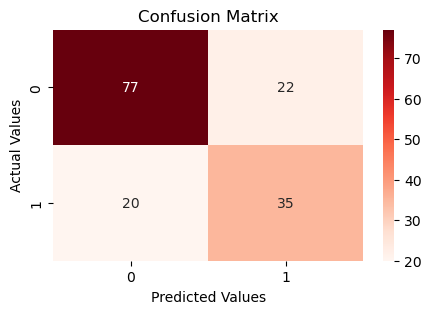

In [28]:
cf_matrix = confusion_matrix (Y_test, rf_y_pred)
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.ylabel ("Actual Values")
plt.xlabel ("Predicted Values")
plt.show ()

In [29]:
rf_accuracy = accuracy_score(Y_test, rf_y_pred) * 100
print("Accuracy of the Decision Tree Classifier model :", round (rf_accuracy, 2))

Accuracy of the Decision Tree Classifier model : 72.73


In [30]:
print("\t\t\tClassification report :\n", classification_report (Y_test, rf_y_pred))

			Classification report :
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



##### <font color="#23C9FF">3.2.5 Support Vector Machines (SVC)</font>

In [31]:
# Random forest model
svc_model = SVC ()

# Fit the model
svc_model.fit (X_train, Y_train)

# Prediction
svc_y_pred = rf_model.predict(X_test)
svc_y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

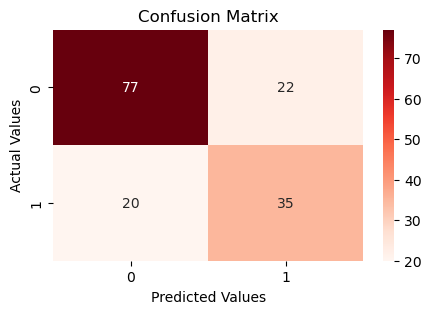

In [32]:
cf_matrix = confusion_matrix (Y_test, svc_y_pred)
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.ylabel ("Actual Values")
plt.xlabel ("Predicted Values")
plt.show ()

In [33]:
svc_accuracy = accuracy_score (Y_test, svc_y_pred) * 100
print ("Accuracy of the Decision Tree Classifier model :", round (rf_accuracy, 2))

Accuracy of the Decision Tree Classifier model : 72.73


In [34]:
print ("\t\t\tClassification report :\n", classification_report (Y_test, svc_y_pred))

			Classification report :
               precision    recall  f1-score   support

           0       0.79      0.78      0.79        99
           1       0.61      0.64      0.62        55

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154



##### <font color="#23C9FF">3.2.6 Neural Networks</font>

In [35]:
# Create a neural network model
nr_model = tf.keras.models.Sequential ([
  tf.keras.layers.Dense (128, activation='relu'),
  tf.keras.layers.Dense (64, activation='relu'),
  tf.keras.layers.Dense (1, activation='sigmoid')
])

# Compile the model
nr_model.compile (optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# Fit the model to the data
nr_model.fit (X_train, Y_train, epochs = 10)

# Make predictions on the test data
nr_y_pred = model.predict (X_test)
nr_y_pred

Epoch 1/10
20/20 [==============================] - 1s 3ms/step - loss: 1.3849 - accuracy: 0.5114
Epoch 2/10
20/20 [==============================] - 0s 5ms/step - loss: 0.8062 - accuracy: 0.6140
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7882 - accuracy: 0.6401
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 0.9497 - accuracy: 0.6189
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7083 - accuracy: 0.6645
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6240 - accuracy: 0.6987
Epoch 7/10
20/20 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6906
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6617 - accuracy: 0.7003
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6111 - accuracy: 0.7101
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.5892 - accuracy: 0.6824


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0])

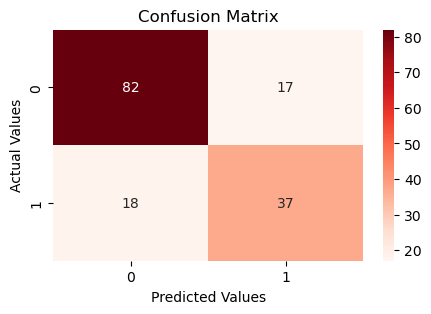

In [36]:
cf_matrix = confusion_matrix (Y_test, nr_y_pred)
plt.figure (figsize = (5, 3))
plt.title ("Confusion Matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Reds', fmt = 'd')
plt.ylabel ("Actual Values")
plt.xlabel ("Predicted Values")
plt.show ()

In [37]:
nn_accuracy = accuracy_score (Y_test, nr_y_pred) * 100
print ("Accuracy of the Decision Tree Classifier model :", round (nn_accuracy, 2))

Accuracy of the Decision Tree Classifier model : 77.27


In [38]:
print ("\t\t\tClassification report :\n", classification_report (Y_test, nr_y_pred))

			Classification report :
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        99
           1       0.69      0.67      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154



##### <font color="#23C9FF">3.3 Comparing Accuracies</font>

In [39]:
print ("++======================++======================++")
print ("||\tAlgorithms\t||\tAccuracy Scores\t||")
print ("++======================++======================++")
print (f"||\tLogistic Reg\t||\t  {round (log_reg_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tK-NN\t\t||\t  {round (knn_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tDecison Tree\t||\t  {round (dtc_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tRandom Forest\t||\t  {round (rf_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tSVC\t\t||\t  {round (svc_accuracy, 2)}  \t||")
print ("++----------------------++----------------------++")
print (f"||\tNeural Network\t||\t  {round (nn_accuracy, 2)}  \t||")
print ("++======================++======================++")

++======================++======================++
||	Algorithms	||	Accuracy Scores	||
++======================++======================++
||	Logistic Reg	||	  77.27  	||
++----------------------++----------------------++
||	K-NN		||	  66.88  	||
++----------------------++----------------------++
||	Decison Tree	||	  74.03  	||
++----------------------++----------------------++
||	Random Forest	||	  72.73  	||
++----------------------++----------------------++
||	SVC		||	  72.73  	||
++----------------------++----------------------++
||	Neural Network	||	  77.27  	||
++======================++======================++


### <center style='color: #23C9FF;'>Conclusion

<p style="text-align : justify;">Based on the training data, the logistic regression and neural network achieved the highest accuracy score, followed by the decision tree. The random forest and support vector machines models also achieved a high accuracy score. These performance of the models on the real world may vary.</p>